<a href="https://colab.research.google.com/github/angelmetanosaa/DTI-Text-Mining-Sentiment-Analysis-of-Hate-Speech/blob/main/Text_Mining_DTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as panda
!pip install nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
!pip install textstat
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# **Loading Data**

In [2]:
import pandas as pd
df = pd.read_csv('hatespeech.txt', sep='\t', header=None, 
                 names=['Label', 'Tweet'], skiprows=1, engine='python')

In [3]:
df

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [4]:
df['Label'].value_counts()

Non_HS    453
HS        260
Name: Label, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [6]:
df.describe()

,Label,Tweet
count,713,713
unique,2,703
top,Non_HS,"Kenapa debat @MataNajwa ini, Ahok makin keliat..."
freq,453,2


In [7]:
df['Label'].replace(['Non_HS','HS'],[0,1],inplace=True)

In [8]:
df

,Label,Tweet
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,1,"Betul bang hancurkan merka bang, musnahkan chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


# **Text Processing**

In [9]:
# removal of capitalization
df['Tweet'] = df['Tweet'].str.lower()

# remove punctuation
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','')

# remove urls
df['Tweet'] = df['Tweet'].str.replace(r'http[\w:/\.]+','')

# remove multple periods with a single one
df['Tweet'] = df['Tweet'].str.replace(r'\.\.+','.')

# replace multple periods with a single one
df['Tweet'] = df['Tweet'].str.replace(r'\.',' .')

# remove whitespace with a single space
df['Tweet'] = df['Tweet'].str.replace(r'\s\s+',' ')

# removal of punctuations and numbers
df['Tweet'] = df['Tweet'].str.replace(r'^a-zA-Z\s',' ')

# replace normal numbers with numbr
df['Tweet'] = df['Tweet'].str.replace(r'\d+(\.\d+)?','numbr')

df['Tweet'] = df['Tweet'].str.strip()

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(sentence):
  return stemmer.stem(sentence)

df['Tweet'] = df['Tweet'].apply(stemming)

In [11]:
df

,Label,Tweet
0,0,rt spardaxyz fadli zon minta mendagri segera n...
1,0,rt baguscondromowo mereka terus luka aksi dala...
2,0,sylvi bagaimana gurbernur laku keras perempuan...
3,0,ahmad dhani tak puas debat pilkada masalah jal...
4,0,rt lisdaulaynumbr waspada ktp palsukawal pilkada
...,...,...
708,1,muka si babi ahok tuh yg mirip serbet lantaiba...
709,1,betul bang hancur merka bang musnah china babi...
710,1,sapa yg bilang ahok anti korupsi klo grombolan...
711,1,gw juga ngimpi sentilin biji babi ahok pcetar ...


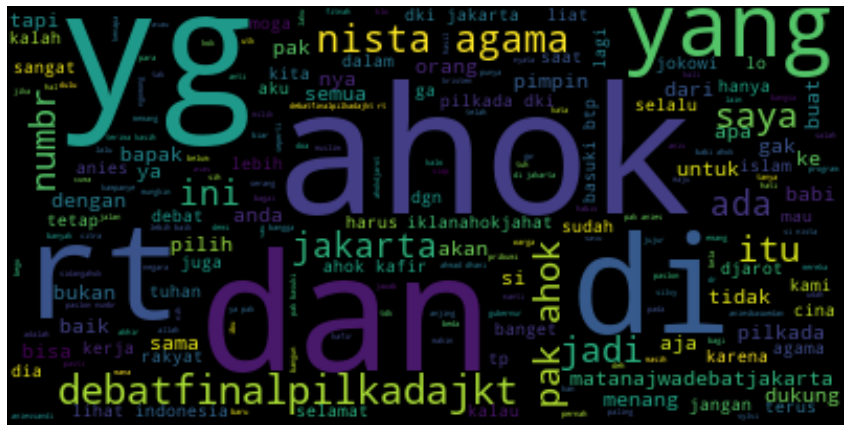

In [12]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
# Start with one review:
wordcloud = ' '.join([text for text in df['Tweet'] ])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'black').generate(wordcloud)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['Tweet'] )
tfidf

<713x464 sparse matrix of type '<class 'numpy.float64'>'
	with 6788 stored elements in Compressed Sparse Row format>

# **Modelling**

In [14]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(df['Tweet'] , df['Label'], shuffle = True, test_size=0.25, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(534,)
(179,)
(534,)
(179,)


## **Logistic Regression**

In [15]:
X = tfidf
y = df['Label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        98
           1       0.89      0.73      0.80        45

    accuracy                           0.89       143
   macro avg       0.89      0.85      0.86       143
weighted avg       0.89      0.89      0.88       143

Logistic Regression, Accuracy Score: 0.8881118881118881


In [16]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.79      0.76      0.77        45

    accuracy                           0.86       143
   macro avg       0.84      0.83      0.84       143
weighted avg       0.86      0.86      0.86       143

Random Forest, Accuracy Score: 0.8601398601398601


In [17]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.87      0.63      0.73        98
           1       0.50      0.80      0.62        45

    accuracy                           0.69       143
   macro avg       0.69      0.72      0.67       143
weighted avg       0.76      0.69      0.70       143

Naive Bayes, Accuracy Score: 0.6853146853146853


In [18]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        98
           1       0.76      0.76      0.76        45

    accuracy                           0.85       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.85      0.85      0.85       143

SVM, Accuracy Score: 0.8461538461538461


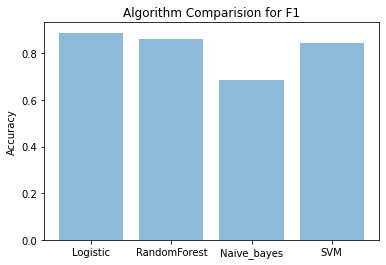

In [19]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()